In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import zipfile

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/HACKATHON/archive (3).zip'

# Directory where the zip file will be extracted
extract_to_path = '/content/dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Dataset extracted to {extract_to_path}")


Dataset extracted to /content/dataset/


In [6]:
import os
print(os.listdir('/content/dataset/'))


['train.csv', 'valid.csv', 'test.csv', 'real_vs_fake']


In [7]:
import os
folder_path = '/content/dataset/real_vs_fake'
print(os.listdir(folder_path))  # List the files/folders inside real_vs_fake


['real-vs-fake']


In [8]:
folder_path = '/content/dataset/real_vs_fake/real-vs-fake'
print(os.listdir(folder_path))  # List the files or folders inside the 'real-vs-fake' folder


['valid', 'train', 'test']


In [9]:

train_folder = '/content/dataset/real_vs_fake/real-vs-fake/train'
print(os.listdir(train_folder))  # Check for 'real' and 'fake' subfolders in the train directory


['real', 'fake']


In [10]:
import os

# Check if the directory exists
train_folder = '/content/dataset/real_vs_fake/real-vs-fake/train'
print(os.listdir('/content/dataset/real_vs_fake/real-vs-fake'))  # Check if the train folder exists


['valid', 'train', 'test']


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to the train/fake and train/real folders
train_folder = '/content/dataset/real_vs_fake/real-vs-fake/train'

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Use the flow_from_directory method to load images in batches
train_data = datagen.flow_from_directory(
    directory=train_folder,
    target_size=(128, 128),  # Resize images to a smaller size to save memory
    batch_size=32,
    class_mode='binary',  # Use binary labels (0 for fake, 1 for real)
    shuffle=True
)

# Optionally, use validation data from the valid folder
valid_data = datagen.flow_from_directory(
    directory='/content/dataset/real_vs_fake/real-vs-fake/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Check the class labels
print(train_data.class_indices)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
{'fake': 0, 'real': 1}


In [12]:
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output for the fully connected layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output layer for binary classification (Fake or Real)
    layers.Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Track accuracy
)


In [14]:
history = model.fit(
    train_data,  # Training data
    steps_per_epoch=train_data.samples // train_data.batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs
    validation_data=valid_data,  # Validation  data
    validation_steps=valid_data.samples // valid_data.batch_size  # Number of validation batches
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 245s 76ms/step - accuracy: 0.6766 - loss: 0.5913 - val_accuracy: 0.7990 - val_loss: 0.4248
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 201s 58ms/step - accuracy: 0.8406 - loss: 0.3680 - val_accuracy: 0.8606 - val_loss: 0.3275
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 158s 50ms/step - accuracy: 0.8909 - loss: 0.2648 - val_accuracy: 0.9007 - val_loss: 0.2407
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 204s 51ms/step - accuracy: 0.9175 - loss: 0.2045 - val_accuracy: 0.9199 - val_loss: 0.2048
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 199s 50ms/step - accuracy: 0.9355 - loss: 0.1634 - val_accuracy: 0.9285 - val_loss: 0.1820
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 201s 50ms/step - accuracy: 0.9460 - loss: 0.1371 - val_accuracy: 0.9365 - val_loss: 0.1747
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 199s 49ms/step - accuracy: 0.9530 - loss: 0.1193 - val_accuracy: 0.9390 - val_loss: 0.1798
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 221s 55ms/step - accuracy: 

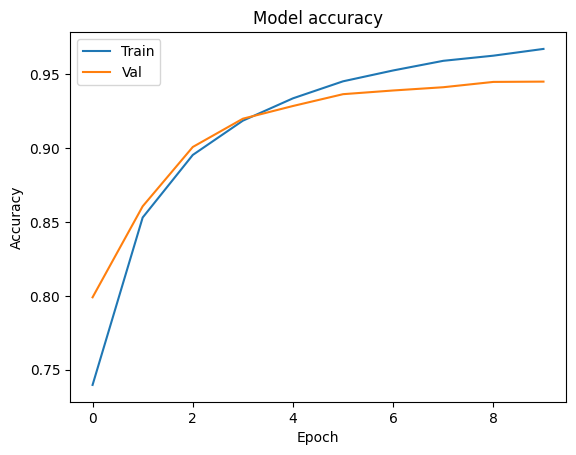

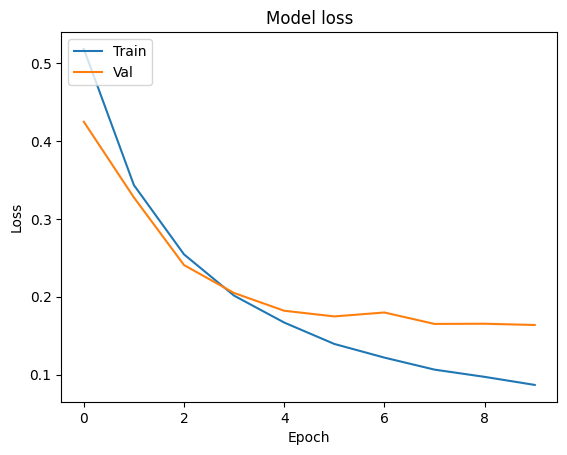

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


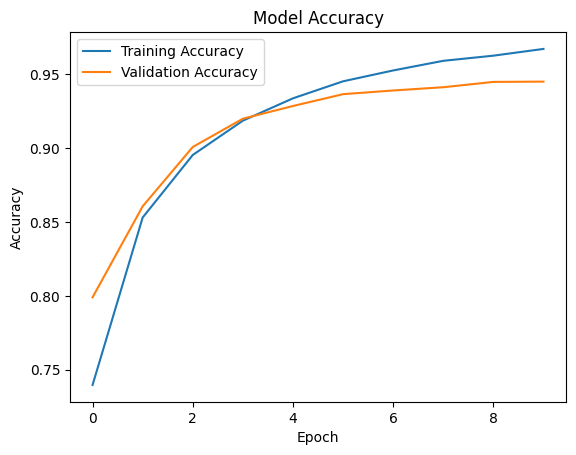

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
# Evaluate the model on the test/validation data
test_loss, test_accuracy = model.evaluate(valid_data)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9303 - loss: 0.2284
Test Loss: 0.1735609769821167
Test Accuracy: 0.9469000101089478


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Real
Confidence: 100.00%


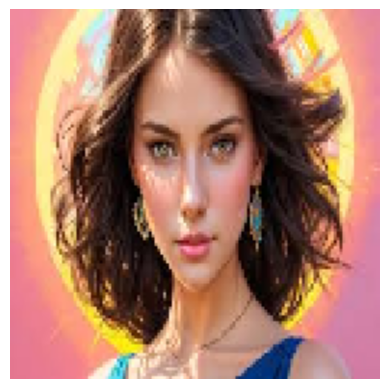

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the model if not already loaded
# model = tf.keras.models.load_model('path_to_your_model')

# Function to preprocess the new image and predict
def predict_image(img_path):
    # Load the image and resize it to the input size of the model
    img = image.load_img(img_path, target_size=(128, 128))  # Adjust size if needed
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale pixel values

    # Make the prediction
    prediction = model.predict(img_array)

    # Get the predicted class
    predicted_class = 'Real' if prediction[0] > 0.5 else 'Fake'

    # Print the predicted class
    print(f"Prediction: {predicted_class}")
    print(f"Confidence: {prediction[0][0]*100:.2f}%")

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example usage:
img_path = '/content/ai.jpg'  # Replace with the path to your new image
predict_image(img_path)
